# import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL 
import seaborn as sns
import socket
import socks
import allensdk
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint
from tqdm import tqdm
from scipy import ndimage as nd
import imageio as io
import json
import os
import datetime
import pycocotools
from pycocotools.mask import encode
import pycocotools.coco as coco
from pycocotools.coco import COCO
import imantics
import cv2
from pycococreatortools import pycococreatortools
import shutil
import pylab

In [8]:
my_cache_dir = '/media/seeker/sda2_1TB/nwb_data'
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=my_cache_dir)
experiment_table = bc.get_ophys_experiment_table()




In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# try mannul 

In [11]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)


In [10]:
coco_output = {
        "info":{},
        "licenses": [],
        "categories": [{
            'id': 1,
            'name': 'neuron',
            'supercategory': 'cell',
    }],
        "images": [],
        "annotations": []
    }
category_info = {'id': 1, 'is_crowd': False}
ID = 0
for i in tqdm(range(500)):
    ophys_experiment_id = experiment_table.index[i]
    dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id)
    image = cv2.imread('/home/seeker/Swin-Transformer-Object-Detection/train/image_{}.png'.format(ophys_experiment_id))
    h,w,c=image.shape
    image_info=pycococreatortools.create_image_info(ophys_experiment_id,'image_{}.png'.format(ophys_experiment_id),[w,h])
    coco_output['images'].append(image_info)
    for j in range(len(dataset.cell_specimen_table)) :
        mask_array = dataset.cell_specimen_table.iloc[j]['roi_mask']
        annotation_info = pycococreatortools.create_annotation_info(ID,ophys_experiment_id,category_info,mask_array)
        ID+=1
        coco_output["annotations"].append(annotation_info)
with open("/home/seeker/Swin-Transformer-Object-Detection/train.json", "w") as outfile:
    json.dump(coco_output,outfile,cls=NpEncoder)

  4%|▍         | 21/500 [00:10<04:01,  1.98it/s]/home/seeker/miniconda3/envs/allensdk/lib/python3.7/site-packages/pycococreatortools/pycococreatortools.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours = np.subtract(contours, 1)
100%|██████████| 500/500 [07:06<00:00,  1.17it/s]


NameError: name 'NpEncoder' is not defined

In [12]:
with open("/home/seeker/Swin-Transformer-Object-Detection/train.json", "w") as outfile:
    json.dump(coco_output,outfile,cls=NpEncoder)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
Custom COCO categories: 
neuron

Custom COCO supercategories: 
cell


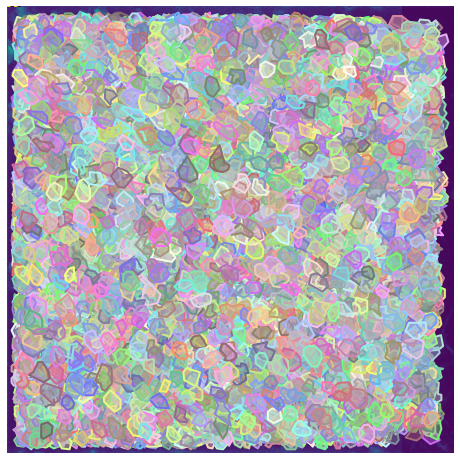

In [21]:
image_directory = '/home/seeker/Swin-Transformer-Object-Detection/train/'
annotation_file = '/home/seeker/Swin-Transformer-Object-Detection/train/train.json'
example_coco = COCO(annotation_file)
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))
category_ids = example_coco.getCatIds(catNms=['neuron'])
image_ids = example_coco.getImgIds(catIds=category_ids)
for i in range(len(image_ids)):
    image_data = example_coco.loadImgs(image_ids[i])
    image = io.imread(image_directory + image_data[0]['file_name'])
    plt.imshow(image); plt.axis('off')
    pylab.rcParams['figure.figsize'] = (8.0, 10.0)
    annotation_ids = example_coco.getAnnIds(imgIds=image_data[0]['id'], catIds=category_ids, iscrowd=None)
    annotations = example_coco.loadAnns(annotation_ids)
    example_coco.showAnns(annotations)


In [22]:
with open("/home/seeker/Swin-Transformer-Object-Detection/train.json", "w") as outfile:
    json.dump(coco_output,outfile,cls=NpEncoder)

In [13]:
coco_output = {
        "info":{},
        "licenses": [],
        "categories": [{
            'id': 1,
            'name': 'neuron',
            'supercategory': 'cell',
    }],
        "images": [],
        "annotations": []
    }
category_info = {'id': 1, 'is_crowd': False}
for i in tqdm(range(500,541)):
    ophys_experiment_id = experiment_table.index[i]
    dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id)
    origin_path ='/home/seeker/Swin-Transformer-Object-Detection/val/image_{}.png'.format(ophys_experiment_id)
    image = cv2.imread(origin_path)
    h,w,c=image.shape
    image_info=pycococreatortools.create_image_info(ophys_experiment_id,'image_{}.png'.format(ophys_experiment_id),[w,h])
    coco_output['images'].append(image_info)
    for j in range(len(dataset.cell_specimen_table)) :
        mask_array = dataset.cell_specimen_table.iloc[j]['roi_mask']
        annotation_info = pycococreatortools.create_annotation_info(ID,ophys_experiment_id,category_info,mask_array)
        ID+=1
        coco_output["annotations"].append(annotation_info)
with open("/home/seeker/Swin-Transformer-Object-Detection/val.json", "w") as outfile:
    json.dump(coco_output,outfile,cls=NpEncoder)

100%|██████████| 41/41 [00:28<00:00,  1.45it/s]


In [ ]:
for i in tqdm(range(342,541)):
    ophys_experiment_id = experiment_table.index[i]
    dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id.index)
    image = dataset.max_projection.data
    plt.imsave('/home/seeker/Swin-Transformer-Object-Detection/image/image_{}.png'.format(ophys_experiment_id),image)

In [ ]:
socks.set_default_proxy(socks.SOCKS5, "127.0.0.1", 1089)
socket.socket = socks.socksocket
for i in range(541,len(experiment_table)):
    ophys_experiment_id = experiment_table.index[i]
    dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id)
    dataset.max_projection
    print("{}".format(i),end=' ')

# try cococreator

# try imantics